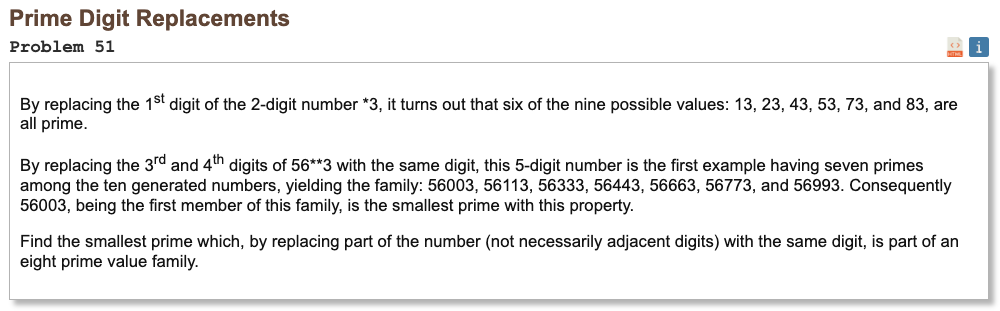

## Initial approach

Repeat 5 digit number scenario.

In [1]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

In [2]:
count = 0
num = 56003

for i in range(0, 999, 110):
    if is_prime(num+i):
        print(num+i)
        count+=1

count

56003
56113
56333
56443
56663
56773
56993


7

* now, iterate through all 5 digit prime numbers
* checks if the number has a repeating digit (at least 3 times)
* replaces all those digits with 0–9 at the same time
* after each change, check is_prime
* when find count 8, stop! print the number.

note: combinations helps us choose different positions in the number to replace the same digit.

In [3]:
%%time

from itertools import combinations

def generate_family(number, change_indexes):
    family = []
    number_str = str(number)
    for replacement_digit in '0123456789':
        new_number = list(number_str)
        for i in change_indexes:
            new_number[i] = replacement_digit
        if new_number[0] == '0':
            continue
        candidate = int(''.join(new_number))
        if is_prime(candidate):
            family.append(candidate)
    return family

def find_smallest_prime_in_family():
    for number in range(100000, 1000000):
        if not is_prime(number):
            continue
        number_str = str(number)
        for digit in set(number_str):
            digit_positions = [i for i, ch in enumerate(number_str) if ch == digit]
            for size in range(1, len(digit_positions) + 1):
                for index_group in combinations(digit_positions, size):
                    family = generate_family(number, index_group)
                    if len(family) == 8:
                        return min(family)

print("Result:", find_smallest_prime_in_family())

Result: 121313
CPU times: user 512 ms, sys: 4.36 ms, total: 517 ms
Wall time: 516 ms
